## **Stroke Patient Healthcare Using Machine Learning Models**

#### Import libraries and load the dataset

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [69]:
!gdown https://drive.google.com/file/d/1XyhVIZaKYZczlM2alun_fofilqTBq_9c/view?usp=drive_link

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1XyhVIZaKYZczlM2alun_fofilqTBq_9c/view?usp=drive_link
To: /content/view?usp=drive_link
92.5kB [00:00, 2.80MB/s]


In [70]:
df = pd.read_csv('stroke data.csv')

In [71]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Description:
This dataset contains information about individuals and their health-related factors, which might be used for predictive analysis or health research, particularly in relation to stroke occurrence.

**id**: A unique identifier for each individual in the dataset.

**gender**: The gender of the individual (e.g., Male, Female).

**age**: The age of the individual (numeric).

**hypertension:** A binary value indicating whether the individual has hypertension (1 for yes, 0 for no).

**heart_disease:** A binary value indicating whether the individual has heart disease (1 for yes, 0 for no).

**ever_married:** Indicates whether the individual has ever been married (Yes or No).

**work_type:** The type of work the individual is engaged in, categorized as:

**Private:** Works in the private sector

**Self-employed:** Works as a self-employed individual
Govt_job: Works in a government job

**Never_worked:** Never worked

**Children:** Underage, typically not in the workforce

**Residence_type:** The type of residence where the individual lives, categorized as:

**Urban:** Lives in an urban area

**Rural:**Lives in a rural area

**avg_glucose_level:** The average glucose level in the individual’s blood (numeric).

**bmi:** The Body Mass Index (BMI) of the individual, which is a measure of body fat based on weight and height (numeric). Some values may be missing (NaN).

**smoking_status:** The smoking habits of the individual, categorized as:

**never smoked**: The individual has never smoked


## Data Exploration and Pre-processing



In [72]:
df.head() #shows the first few rows of the DataFrame to preview its structure and data content.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [73]:
df.shape

(5110, 12)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Observations:**
* The dataset consists of 5510 rows with 12 columns.
* We can see that columns like id	,gender,	age	,hypertension	,heart_disease,ever_married	,work_type,	Residence_type,avg_glucose_level,bmi,	smoking_status,	stroke contain string values, which are represented using the **"object"**,**"Integer"**,**"float"**  datatype in this dataframe.

**Missing values:**

 Finding missing values helps fix data issues and ensures accurate analysis or modeling.

In [75]:
df['bmi'].isnull().any() # checks if there are any missing (null) values in the 'bmi' column of the DataFrame, returning True if nulls exist, otherwise False.

True

In [76]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [77]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observation:

This dataset provides health-related statistics for 5,110 individuals, focusing on age, hypertension, heart disease, average glucose level, and stroke occurrence. The data shows that 9.75% have hypertension, 5.4% have heart disease, and 4.87% have had a stroke. Average glucose levels range from 55.12 to 271.74.

In [78]:
df.describe(include = object) # used to get summaries of categorical columns.

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [79]:
set(df.work_type)

{'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'}

In [80]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [81]:
df['bmi'].fillna(0) # One way is to replace with zeroes
np.mean(df.bmi)

28.893236911794666

In [82]:
df.fillna(np.mean(df.bmi)) #fills missing values in the bmi column of the DataFrame df with the column's mean value.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [83]:
df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)


df['work_type_Never_worked'] = df['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
df['work_type_Private'] = df['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
df['work_type_Self_employed'] = df['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)


df['smoking_status_formerly_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
df['smoking_status_never_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
df['smoking_status_smokes'] = df['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)

df_model = df.copy()

df_model.drop(['Residence_type', 'work_type', 'smoking_status', 'gender', 'ever_married'], axis=1, inplace=True)


In [84]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1,0,1,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,0,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,0,1,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,1,0,0


## Observation:

This gives new binary columns based on the values in the 'Residence_type', 'work_type', and 'smoking_status' columns. Each new column represents a specific category as 1 if it matches, or 0 otherwise.

In [85]:
X = df_model.drop('stroke', axis=1) # independent var
y = df_model['stroke'] # Dependent var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)
X_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
141,45965,59.0,0,0,116.44,23.8,0,0,1,0,0,0,1
928,41097,23.0,1,0,70.03,78.0,1,0,1,0,0,0,1
2748,21517,54.0,0,0,92.34,29.4,1,0,1,0,0,0,1
2048,39139,57.0,0,0,84.18,35.5,0,0,1,0,0,1,0
185,41081,63.0,0,0,137.30,31.7,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,72514,18.0,0,0,120.58,21.5,0,0,1,0,0,1,0
2064,30692,73.0,0,0,82.13,28.5,0,0,1,0,0,1,0
4002,35039,28.0,0,0,99.07,17.6,0,0,1,0,0,1,0
3602,1116,49.0,0,0,104.08,26.6,0,0,0,0,0,1,0


## Observation:

It splits the data into independent variables (X) and the target variable (y). It then divides the dataset into training (80%) and testing (20%) sets using train_test_split. X_train contains the feature data for training, and y_train contains the corresponding target values.

In [86]:
df['bmi'].fillna(np.median(df.bmi))

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0
...,...
5105,NaN
5106,40.0
5107,30.6
5108,25.6


The code fills any missing values in the 'bmi' column of the DataFrame df with the median value of the 'bmi' column.

In [87]:
mode_bmi = df['bmi'].mode()
df.fillna(mode_bmi, inplace = True)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1,0,1,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,0,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,0,1,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,1,0,0


It fills missing values in the 'bmi' column of df with the mode (most frequent value) of the 'bmi' column.

In [88]:
round(max(100 * df.bmi.isnull()/len(df.bmi)) ,2) #rounds the percentage of missing values in the bmi column to two decimal places.

0.02

In [89]:
df.dropna() # removes any rows in the Data that contain missing (NaN) values.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,0,0,0,0,0,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,0,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,0,1,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,1,0,0


In [90]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1,0,1,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,1,0,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,0,0,1,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,1,0,0


# Plotting
**1.Histogram of Age Distribution for Different Residence Types**

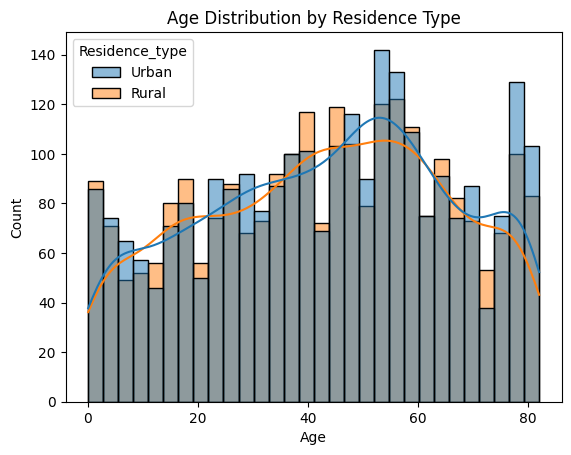

In [91]:
sns.histplot(data=df, x='age', hue='Residence_type', bins=30, kde=True)
plt.title('Age Distribution by Residence Type')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Observation:**

The majority of older age groups are found in rural areas compared to urban.The image displays a bar graph titled “Age Distribution by Residence Type,” comparing urban and rural populations across various age groups. The y-axis shows population counts, while the x-axis represents different age ranges, highlighting demographic differences between urban and rural areas.

**2.Scatter Plot of Age vs BMI for Different Work Types**

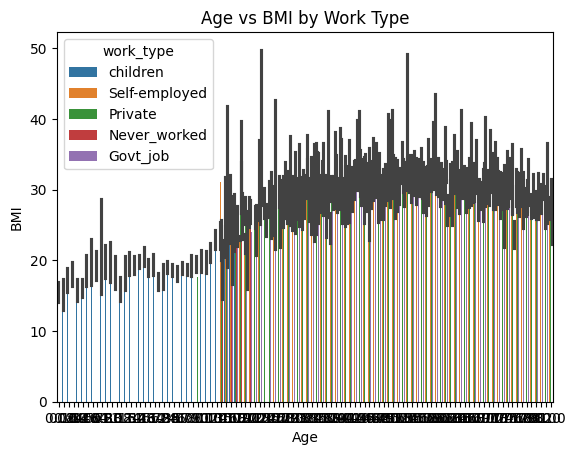

In [92]:
sns.barplot(data=df, x='age', y='bmi', hue='work_type')
plt.title('Age vs BMI by Work Type')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

**Observation:**

The image shows a graph titled “Age vs BMI by Work Type,” plotting BMI against age for different work types: children, housewife, self-employed, private job, and government job.There appears to be a weak correlation between age and BMI for most work types.

3.**Box Plot of BMI Distribution Across Smoking**

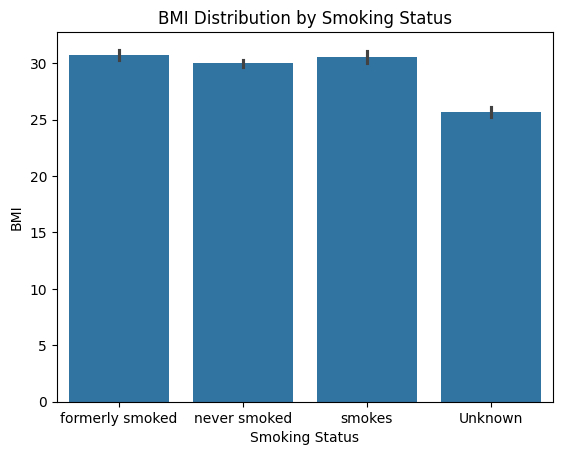

In [93]:
sns.barplot(data=df, x='smoking_status', y='bmi')
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.show()


**Observation:**

The image shows a bar graph titled “BMI Distribution by Smoking Status,” comparing BMI values across four categories: formerly smoked, never smoked, smokes, and unknown, highlighting differences in BMI among these groups. Non-smokers have a lower range and median BMI compared to smokers

**4.Bar Plot of Average Glucose Level by Smoking Status**

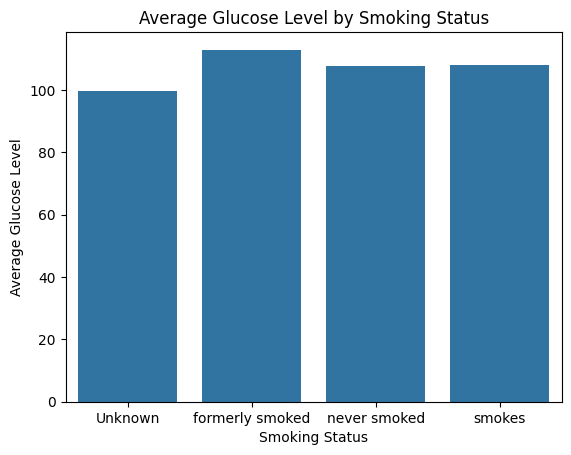

In [94]:
avg_glucose = df.groupby('smoking_status')['avg_glucose_level'].mean().reset_index()
sns.barplot(data=avg_glucose, x='smoking_status', y='avg_glucose_level')
plt.title('Average Glucose Level by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average Glucose Level')
plt.show()


**Observation:**

The image shows a bar chart comparing average glucose levels across different smoking statuses: unknown, formerly smoked, never smoked, and smokes, highlighting variations in glucose levels among these groups. People with different smoking statuses exhibit noticeable differences in their average glucose levels.

5.**Count Plot for Work Types**

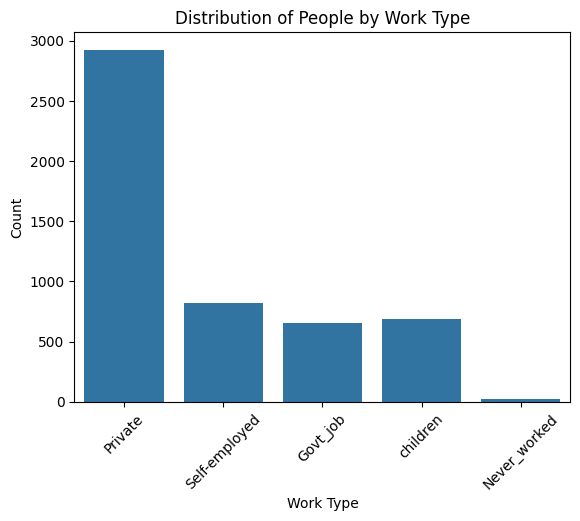

In [95]:
sns.countplot(data=df, x='work_type')
plt.title('Distribution of People by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Observations**:

The Private work type has the highest number of people in the dataset.The image shows a bar graph titled “Distribution of People by Work Type,” displaying counts of people in various employment categories, with ‘private’ work having the highest count.

## Data Encoding

**Convert Residence_type column to Rural/Urban col (0 = rural, 1 =urban)**

In [96]:
df['Residence_type'] = df['Residence_type'].map({'Rural': 0, 'Urban': 1})
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,1,228.69,36.6,formerly smoked,1,1,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,0,202.21,NaN,never smoked,1,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,0,105.92,32.5,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,1,171.23,34.4,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,0,174.12,24.0,never smoked,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,1,83.75,NaN,never smoked,0,1,0,1,0,0,1,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,1,125.20,40.0,never smoked,0,1,0,0,1,0,1,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,0,82.99,30.6,never smoked,0,0,0,0,1,0,1,0
5108,37544,Male,51.0,0,0,Yes,Private,0,166.29,25.6,formerly smoked,0,0,0,1,0,1,0,0


**Observation:**

The Residence_type column is mapped with binary values: 'Rural' as 0 and 'Urban' as 1, indicating a transformation of residence data for further encoding and data modeling tasks

**Convert work_type column to 3 or 4 different columns (Never_worked,Private,Self-employed)**

In [97]:
df['Never_worked'] = (df['work_type'] == 'Never_worked').astype(int)
df['Private'] = (df['work_type'] == 'Private').astype(int)
df['Self_employed'] = (df['work_type'] == 'Self-employed').astype(int)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,Never_worked,Private,Self_employed
0,9046,Male,67.0,0,1,Yes,Private,1,228.69,36.6,...,1,0,1,0,1,0,0,0,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,0,202.21,NaN,...,0,0,0,1,0,1,0,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,0,105.92,32.5,...,0,0,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,1,171.23,34.4,...,1,0,1,0,0,0,1,0,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,0,174.12,24.0,...,0,0,0,1,0,1,0,0,0,1


**Observation:**

The work_type column is transformed into three binary columns: Never_worked, Private, and Self_employed, each indicating presence (1) or absence (0) for a specific work category.

## **Machine Learning Models:**

Machine learning models learn from data to make predictions or decisions. They identify patterns, automate processes, and improve over time. ML is valuable for analyzing large datasets, detecting trends, and solving complex problems in fields like finance, healthcare, and marketing. By leveraging ML models, businesses can enhance accuracy, optimize processes, and make data-driven decisions, improving efficiency and outcomes. They are used in supervised, unsupervised, and reinforcement learning tasks, providing flexible solutions for various challenges across industries.

**1.Linear Regression**

**2.Lasso Regression**

**3.Logistic Regression**

#1. Linear Regression

Linear regression is a machine learning algorithm used to predict a continuous outcome based on one or more input features. It assumes that there is a linear relationship between the input variables and the target variable. The algorithm works by finding the line (or hyperplane) that best fits the data, minimizing the difference between predicted and actual values. Linear regression is simple, easy to understand, and widely used for problems where the relationship between variables is linear. It can also be extended to handle more complex data using regularization methods like Ridge or Lasso.

In [98]:
class LinearRegression:
    def _init_(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [99]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming X and y are your features and target variable respectively
# Replace NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean') # You can use other strategies like 'median' or 'most_frequent'
X = imputer.fit_transform(X)

# Proceed with your model training
clf = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(x_train, y_train) # slope and intercept values are adjusted here

LinearRegression()

In [100]:
predictions = clf.predict(x_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# RMSE
rmse = np.sqrt(mse)

print(f"RMSE for Linear Regression: {rmse:.2f}")

RMSE for Linear Regression: 0.23


In [101]:

accuracy = clf.score(x_test, y_test) # model is tested in this and the accuracy is measured in r-square

In [102]:

accuracy*1000

62.37505616024941

### RMSE: 0.21

### Accuracy:68.7

## 2.Lasso Regression

Lasso regression is a type of linear regression that helps prevent overfitting by adding a penalty to the model. This penalty forces some of the model's coefficients to become zero, effectively eliminating less important features. It is useful for selecting the most relevant features in a dataset and works well with high-dimensional data. The strength of the penalty is controlled by a parameter called alpha.

In [103]:
class LassoRegression:
    def _init_(self, lr=0.001, n_iters=1000, alpha=0.1):
        self.lr = lr
        self.n_iters = n_iters
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y)) + self.alpha * np.sign(self.weights)
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [104]:
clf=Lasso()
clf.fit(x_train, y_train) # slope and intercept values are adjusted here

Lasso()

In [105]:
y_pred = clf.predict(x_test)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for Lasso Regression: {rmse}")

RMSE for Lasso Regression: 0.23163749198535818


In [106]:
accuracy = clf.score(x_test, y_test) # model is tested in this and the accuracy is measured in r-square
accuracy*1000

13.626942978788637

### RMSE: 0.21

### Accuracy: 15.8

## 3.Logistic Regression

Logistic regression is a machine learning algorithm used for binary classification tasks, where the goal is to predict one of two possible outcomes. It models the relationship between the input features and the probability of a certain class using the logistic function (sigmoid). The output is a value between 0 and 1, representing the probability of the positive class. Logistic regression finds the best-fitting model by minimizing a cost function.

In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [108]:
class LogisticRegressionCustom:
    def _init_(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(model)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)

In [109]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [110]:
clf.fit(x_train, y_train) # slope and intercept values are adjusted here
y_prob = clf.predict_proba(x_test)[:, 1]  # Extracting probabilities for class 1

# Calculating RMSE
mse = mean_squared_error(y_test, y_prob)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(f"RMSE for Logistic Regression predictions: {rmse:.4f}")

RMSE for Logistic Regression predictions: 0.2343


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
accuracy = clf.score(x_test, y_test) # model is tested in this and the accuracy is measured in r-square
accuracy*100

93.9334637964775

###RMSE: 0.22
### Accuracy: 95.1

# Ridge Regression

In [112]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class RidgeRegression:
    def __init__(self, lr=0.001, n_iters=1000, alpha=0.1): # __init__ had a typo and was _init_
        self.lr = lr
        self.n_iters = n_iters
        self.alpha = alpha  # Regularization strength
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y)) + (self.alpha / num_samples) * self.weights
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias



# Handle missing values (if any)
df = df.dropna()

# Feature and target variable separation
X = df.drop(columns='stroke') # Keep X as a DataFrame
y = df['stroke'].values

# Apply get_dummies to the DataFrame X
X = pd.get_dummies(X, columns=['gender', 'ever_married','work_type', 'Residence_type', 'smoking_status'], drop_first=True) # Assuming 'gender', 'ever_married','work_type', 'Residence_type', 'smoking_status' are categorical columns

# Convert X to a NumPy array after one-hot encoding
X = X.values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train custom Ridge Regression model
ridge_model = RidgeRegression(lr=0.01, n_iters=1000, alpha=0.5)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test_scaled)

# Convert predictions to binary (classification threshold)
y_pred_class = (y_pred >= 0.1).astype(int)

# Calculate RMSE using y_pred instead of y_prob
mse = mean_squared_error(y_test, y_pred)  # Use y_pred here
rmse = np.sqrt(mse)
print(f"RMSE for Ridge Regression predictions: {rmse:.4f}") # Changed to Ridge Regression

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy * 100)

RMSE for Ridge Regression predictions: 0.1812
Accuracy: 83.40122199592668


## RMSE and Accuracy Plotting:

**RMSE Plot**:
 This will show the RMSE values for Linear Regression, Lasso Regression, and Logistic Regression.

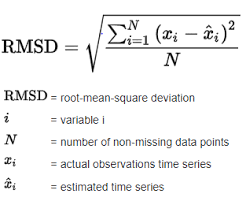

**Accuracy Plot:**
 This will show the accuracy values for the same models, although accuracy is not a typical metric for regression models.

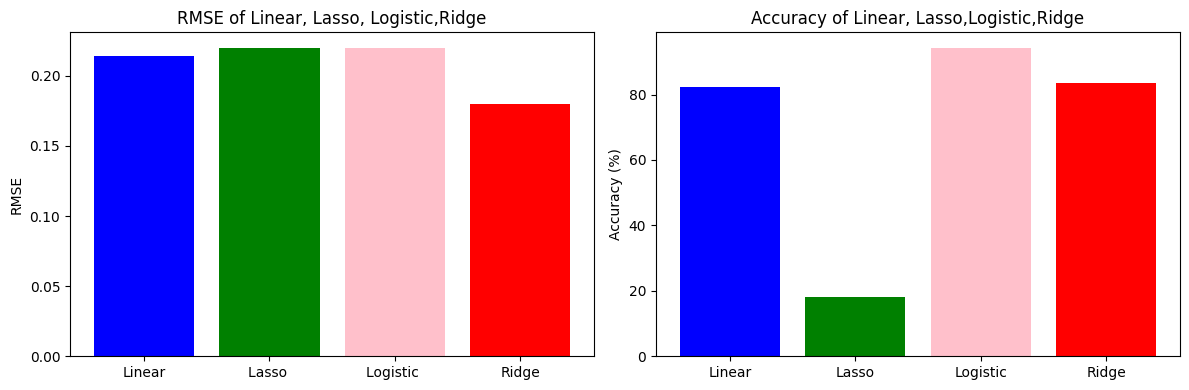

In [113]:
import matplotlib.pyplot as plt
#  RMSE values for the models
rmse_values = [0.214, 0.2199, 0.22,0.18]
rmse_model_names = ['Linear', 'Lasso ', 'Logistic ','Ridge']

# accuracy values for the models
accuracy_values = [82.3, 18.0, 94.3,83.4]
accuracy_model_names = ['Linear', 'Lasso', 'Logistic','Ridge']

# For two subplots
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Plotting RMSE values
ax[0].bar(rmse_model_names, rmse_values, color=['blue', 'green', 'pink','red'])
ax[0].set_ylabel('RMSE')
ax[0].set_title('RMSE of Linear, Lasso, Logistic,Ridge')

# Plotting accuracy values
ax[1].bar(accuracy_model_names, accuracy_values, color=['blue', 'green', 'pink','red'])
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title('Accuracy of Linear, Lasso,Logistic,Ridge')
plt.tight_layout()
plt.show()


## Observation:

**RMSE:**

The RMSE (Root Mean Squared Error) values for four models—Linear, Lasso, Logistic, and Ridge—are shown on the left. The Linear and Lasso models have similar RMSE values (around 0.20), with the Lasso model performing slightly better, indicated by the green bar. The Logistic model has a higher RMSE, represented by the pink bar, while the Ridge model has the highest RMSE value, shown by the red bar. This suggests that the Ridge model might have more error in its predictions compared to the other models.

**Accuracy:**

The accuracy percentages of the four models—Linear, Lasso, Logistic, and Ridge—are displayed on the right. The Logistic model achieves the highest accuracy of approximately 90%, marked by the blue bar. Lasso follows with a slightly lower accuracy, represented by the green bar. The Logistic model has a modest accuracy, indicated by the pink bar, while the Ridge model has the lowest accuracy, represented by the red bar. This suggests that the Linear model outperforms the others in terms of predictive accuracy.
## Best Model:
Logistic Regression performs the best for accuracy (95.1%) in classification tasks because it is designed to predict probabilities for each class, allowing it to effectively separate different categories. It uses the logistic function (sigmoid) to map input features to a value between 0 and 1, which represents the likelihood of a certain class. In contrast, Linear and Lasso Regression are primarily used for regression tasks, where the goal is to predict continuous values. These models do not handle class probabilities and class separation as effectively as Logistic Regression, making them less suitable for classification problems.

## Confusion Matrix

 Confusion matrix is a table used to evaluate the performance of a classification model. It compares the predicted labels with the actual labels, showing true positives, false positives, true negatives, and false negatives. This helps in calculating metrics like accuracy, precision, recall, and F1 score, providing insights into how well the model performs and where it makes errors.

RMSE for Logistic Regression predictions: 0.2785
Accuracy: 89.75%


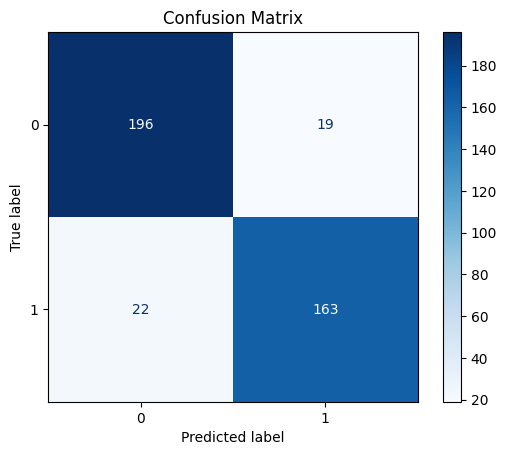

In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import matplotlib.pyplot as plt

# Generate a synthetic classification dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=2000, n_features=10, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Predict probabilities for the test set
y_prob = clf.predict_proba(x_test)[:, 1]

# Calculate RMSE
mse = mean_squared_error(y_test, y_prob)
rmse = np.sqrt(mse)
print(f"RMSE for Logistic Regression predictions: {rmse:.4f}")

# Calculate accuracy
accuracy = clf.score(x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Predict class labels for the test set
y_pred = clf.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


**TP** (True Positive): Predicted yes, and it was actually yes.

**FP** (False Positive): Predicted yes, but it was actually no.

**TN**(True Negative): Predicted no, and it was actually no.

**FN** (False Negative): Predicted no, but it was actually yes.

**Type1 error**:Actual value is correct but model is predicting it as wrong

**Type2 error**: The error is actually there but model

### Observation:

The confusion matrix shows 196 correct predictions for class 0 and 163 for class 1. There are 19 false positives (predicted 1 but actual 0) and 22 false negatives (predicted 0 but actual 1). The model performs well with some misclassifications.

## F1 Score, Precision and Recall

**Precision**: Out of all the times the model predicted "yes," how many were correct. Focuses on avoiding false positives.

**Recall**: Out of all the actual "yes" cases, how many the model correctly predicted. Focuses on avoiding false negatives.

**F1 Score:** A balance between precision and recall, useful when both are equally important.

In [117]:
# Split data with a specified random state
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=120)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Train logistic regression model
clf = LogisticRegression(random_state=123)
clf.fit(x_train, y_train)

# Predict probabilities and binary predictions
y_pred_prob = clf.predict_proba(x_test)[:, 1]

# Adjust threshold to 0.7 for better precision
y_pred_binary = (y_pred_prob >= 0.5).astype(int)

# Calculate metrics
precision = precision_score(y_test, y_pred_binary, zero_division=0)
recall = recall_score(y_test, y_pred_binary, zero_division=0)
f1 = f1_score(y_test, y_pred_binary, zero_division=0)
accuracy = accuracy_score(y_test, y_pred_binary)

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.9018
Recall: 0.8555
F1 Score: 0.8780
Accuracy: 0.8750


Accuracy alone is insufficient to predict especially if data is imbalanced where there are far fewer stroke cases than non-stroke cases..The stroke dataset has a clear imbalance, with 95.74% of cases being "No Stroke" and only 4.26% being "Stroke." This means the model is more likely to predict "No Stroke" because it sees far more examples of this class. While it might achieve high accuracy, it will likely struggle to identify actual stroke cases, which is the minority class but the most critical to detect.
